In [6]:
import numpy as np
import matplotlib.pyplot as plt

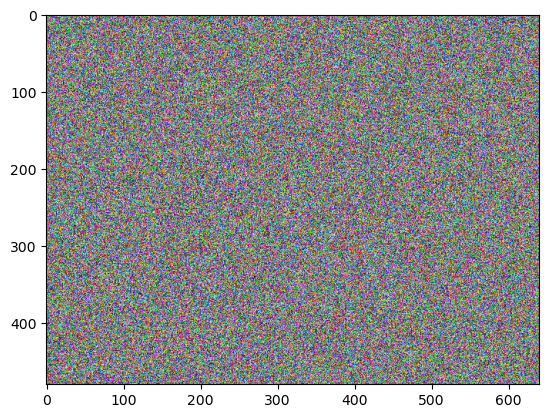

In [8]:
im_shape = 480,640,3
im = np.random.rand(*im_shape)
plt.imshow(im)
plt.show()

# thai flag

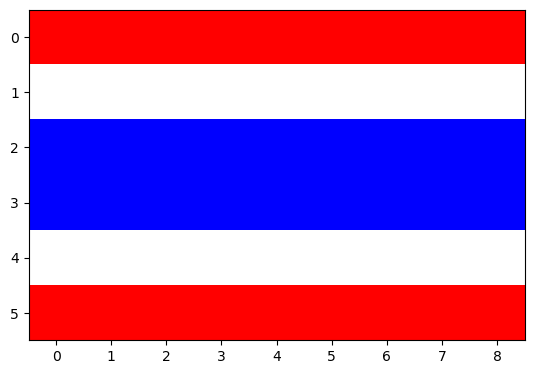

In [11]:
#thai flag
thai = np.ones((6,9,3))
thai[[0,-1],:,1:] = 0
thai[2:4,:,:2] = 0
plt.imshow(thai)
plt.show()

# japan flag

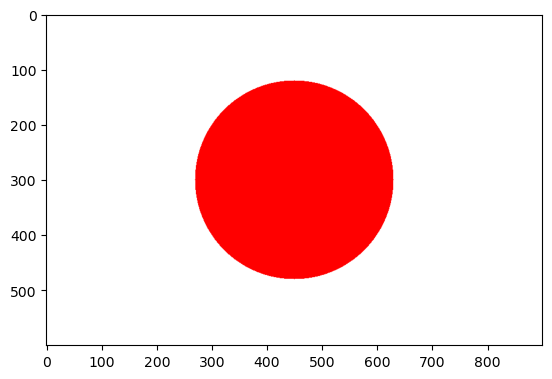

In [14]:
#japan flag
japan = np.ones((600,900,3))
r= 3/5/2*japan.shape[0]
c=[i//2 for i in japan.shape[:2]]
for i in range(japan.shape[0]):
    for j in range(japan.shape[1]):
        if(i-c[0])**2 + (j-c[1])**2 <= r**2:
            japan[i,j,1:]=0
plt.imshow(japan)
plt.show()

# image read

In [17]:
!pip install opencv-python

In [19]:
import cv2

In [21]:
im = cv2.imread('dragon.jpg')
cv2.imshow('im',im)
cv2.waitKey()

-1

In [23]:
!pip install Pillow

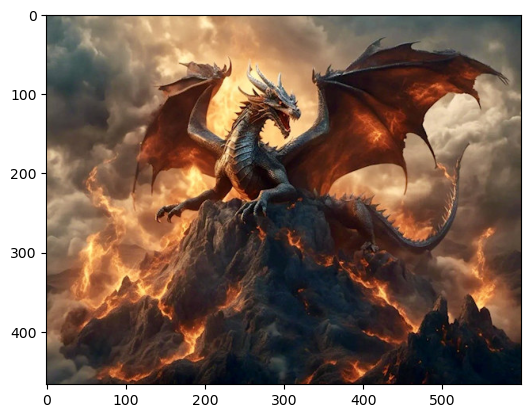

In [24]:
from PIL import Image
im =Image.open('dragon.jpg')
im =np.array(im)
plt.imshow(im)
plt.show()

# save image

In [64]:
im = Image.fromarray(np.uint8(japan*255))
im.save('japan.jpg')

In [66]:
im2 = Image.fromarray(np.uint8(255-japan*255))
im.save('japan.gif',save_all=True,append_images=[im2,im]*20)

# test down sampling

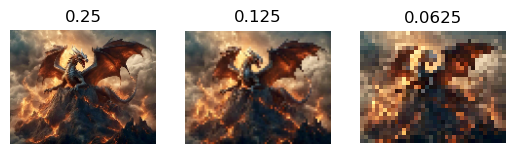

In [27]:
n=3
for i in range(1,n+1):
    plt.subplot(1,n,i)
    s=1/2**(i+1)
    plt.imshow(cv2.resize(im,None,fx=s,fy=s))
    plt.axis('off')
    plt.title(str(s))
plt.show()

In [113]:
def image2bitplane(img):
    bp=[]
    for c in range(img.shape[2]):
        for i in range(8):
            bp.append(img[:,:,c]//2**i%2)
    return np.array(bp)

def bitplane2image(bp):
    img = np.zeros((bp[0].shape[0],bp[1].shape(1),3))
    for b in range(len(bp)):
        img[:,:,b//8] = img[:,:,b//8] + (bp[b]*2**(b%8))
    return np.uint8(img)

# create video

In [116]:
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
framesize = (480,640,3)
vdo_writter = cv2.VideoWriter('Out.mp4',fourcc,30,(framesize[1],framesize[0]))
for i in range(640):
    frame = np.zeros(framesize,np.uint8)
    cv2.circle(frame,(i,200),20,(255,255,255),-1)
    vdo_writter.write(frame)
vdo_writter.release()

In [45]:
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
framesize = (480,640,3)
vdo_writter = cv2.VideoWriter('red.mp4',fourcc,30,(framesize[1],framesize[0]))
for i in range(640):
    frame = np.zeros(framesize,np.uint8)
    cv2.circle(frame,(i,200),20,(0,0,255),-1)
    vdo_writter.write(frame)
vdo_writter.release()

# open video

In [25]:
#cap = cv2.VideoCapture(0)
cap = cv2.VideoCapture('Out.mp4')
while cap.isOpened():
    ret,frame = cap.read()
    if ret:
        cv2.imshow('frame',frame[:,::-1,:])
    if cv2.waitKey(1) == ord('q') or not ret:
        break
cap.release()
cv2.destroyAllWindows()

# detect color

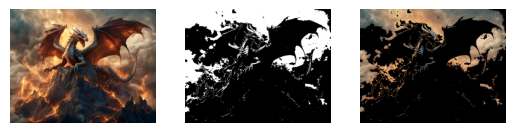

True

In [41]:
A = cv2.imread('dragon.jpg')
tol = 150
color = np.array([233,141,89])
mask = cv2.inRange(A,color-tol,color+tol)
Amask = cv2.bitwise_and(A,A,mask=mask)
cv2.imshow('dragon',A)
cv2.imshow('mask',mask)
cv2.imshow('Amask',Amask)
plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(A, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(Amask, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
cv2.waitKey()
cv2.imwrite('mask.png',mask)
cv2.imwrite('Amask.png',Amask)

In [31]:
cap = cv2.VideoCapture('red.mp4')
buffer = None
while True:
    ret,frame = cap.read()
    if not ret or cv2.waitKey(1) == ord('q'):
        break
    if buffer is not None:
        diff = np.mean(cv2.absdiff(frame,buffer),axis=2)
        fg = np.uint8((diff > 0.5*np.max(diff))*255)
        cv2.imshow('diff',np.uint8(diff/np.max(diff)*255))
        cv2.imshow('fg',fg)
    buffer = frame
    cv2.imshow('frame',frame)
cap.release()
cv2.destroyAllWindows()